In [471]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1. Exploratory Data Analysis

In [472]:
#upload json file into pandas dataframe
with open('/Users/joyopsvig/github/springboard/Unit26-TakeHomeChallenges/ultimate_challenge/logins.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [473]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [475]:
#Convert string into datetime format
df['login_time'] = pd.to_datetime(df['login_time'], format='%Y-%m-%d %H:%M:%S')

In [476]:
#Confirm no values missing
df.isna().sum()

login_time    0
dtype: int64

In [477]:
#Aggregate data into 15min time intervals
df = df.groupby(df.login_time.dt.floor('15Min')).size().to_frame('login_count').reset_index()

In [478]:
df

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9376,1970-04-13 17:45:00,5
9377,1970-04-13 18:00:00,5
9378,1970-04-13 18:15:00,2
9379,1970-04-13 18:30:00,7


In [479]:
df['hour'] = pd.DatetimeIndex(df['login_time']).time
df['day'] = pd.DatetimeIndex(df['login_time']).day
df['weekday'] = pd.DatetimeIndex(df['login_time']).weekday
df['month'] = pd.DatetimeIndex(df['login_time']).month


In [480]:
df.head()

,login_time,login_count,hour,day,weekday,month
0,1970-01-01 20:00:00,2,20:00:00,1,3,1
1,1970-01-01 20:15:00,6,20:15:00,1,3,1
2,1970-01-01 20:30:00,9,20:30:00,1,3,1
3,1970-01-01 20:45:00,7,20:45:00,1,3,1
4,1970-01-01 21:00:00,1,21:00:00,1,3,1


In [481]:
df_hour = df.groupby('hour')['login_count'].sum().to_frame().reset_index()

In [482]:
df_hour.head()

,hour,login_count
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549


<AxesSubplot:xlabel='hour', ylabel='login_count'>

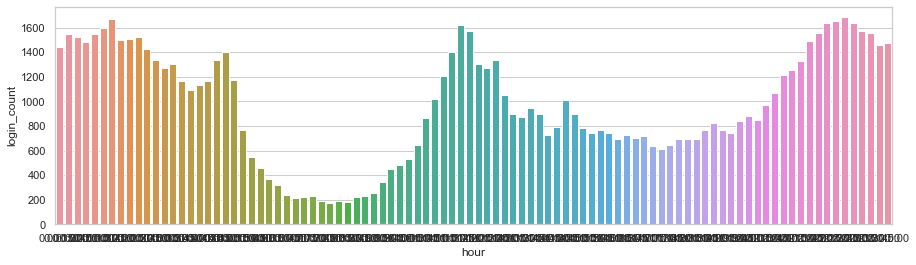

In [483]:
plt.figure(figsize = (15,4))
sns.barplot(x='hour', y='login_count', data=df_hour)

In [484]:
df_weekday = df.groupby('weekday')['login_count'].sum().to_frame().reset_index()
df_weekday.reset_index(drop=True, inplace=True)
df_weekday['weekday'] = df_weekday['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
df_weekday


,weekday,login_count
0,sunday,8823
1,monday,9268
2,tuesday,10339
3,wednesday,11960
4,thursday,15208
5,friday,19377
6,saturday,18167


<AxesSubplot:xlabel='weekday', ylabel='login_count'>

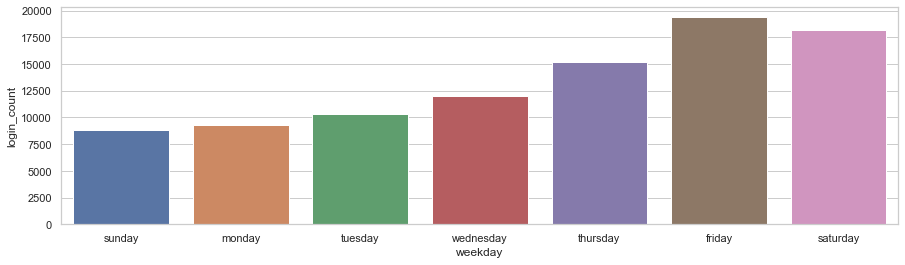

In [485]:
plt.figure(figsize = (15,4))
sns.barplot(x='weekday', y='login_count', data=df_weekday)

In [486]:
df_month = df.groupby('month')['login_count'].sum().to_frame().reset_index()
df_month.reset_index(drop=True, inplace=True)
df_month

,month,login_count
0,1,21239
1,2,24673
2,3,33723
3,4,13507


In [487]:
df_month['month'] = df_month['month'].replace([1, 2, 3, 4],['january', 'february', 'march', 'april'])

<AxesSubplot:xlabel='month', ylabel='login_count'>

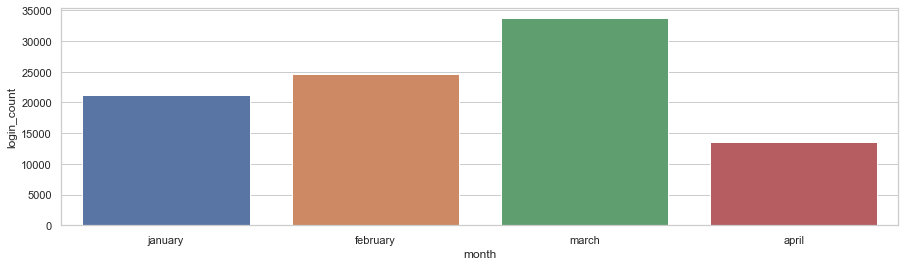

In [488]:
plt.figure(figsize = (15,4))
sns.barplot(x='month', y='login_count', data=df_month)

### Part 2. Experiment and metrics design
_The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities._

_However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs._

**1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

For a key measure of success for this experiment, I would measure the revenue the drivers bring in via rides minus the toll costs. At the end of the day, it is only beneficial for the Ultimate managers of city operations to encourage drivers to cross over to the other cities if it increases revenue.

**2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:**
    
_a) how you will implement the experiment_

My null hypothesis would be that the business revenue from Ultimate Gotham and Ultimate Metropolis does not increase with the new act of reimbursing all toll costs for drivers.

I would collate data on average revenue total and average revenue per cities prior to implementing the experiment for a set date in time.

Then I would run the experiment for a set date in time to collect information on riders, money brought in, and amount spent in toll costs.

_b) what statistical test(s) you will conduct to verify the significance of the observation_

I would use a two-sided t-test to compare the two averages of revenue (prior to experiment, and revenue collected from experiment minus toll costs) to determine if statistically they are the same, or if I can reject the null hypothesis.

_c) how you would interpret the results and provide recommendations to the city operations team along with any caveats._

If it is clear that there is a statisticallly signficant increase in revenue due to the implementation of reimbursing all toll costs, then I would relay this to the city operations teams and provide the caveat that it is also worth looking into more tests regarding the experiment, such as if specific times are more beneficial than other times, or specific days. The goal would be to optimize spend and increase revenue for the Ultimate company.

### Part 3. Predictive Modeling

In [489]:
#upload json file into pandas dataframe
with open('/Users/joyopsvig/github/springboard/Unit26-TakeHomeChallenges/ultimate_challenge/ultimate_data_challenge.json', 'r') as f:
    data = json.load(f)
u_df = pd.DataFrame(data)

**1) Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?**

In [490]:
u_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [491]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [492]:
u_df = u_df.dropna()

In [493]:
u_df['last_trip_date'] = pd.to_datetime(u_df['last_trip_date'])
u_df['signup_date'] = pd.to_datetime(u_df['signup_date'])

In [494]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41445 non-null  object        
 1   trips_in_first_30_days  41445 non-null  int64         
 2   signup_date             41445 non-null  datetime64[ns]
 3   avg_rating_of_driver    41445 non-null  float64       
 4   avg_surge               41445 non-null  float64       
 5   last_trip_date          41445 non-null  datetime64[ns]
 6   phone                   41445 non-null  object        
 7   surge_pct               41445 non-null  float64       
 8   ultimate_black_user     41445 non-null  bool          
 9   weekday_pct             41445 non-null  float64       
 10  avg_dist                41445 non-null  float64       
 11  avg_rating_by_driver    41445 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [495]:
u_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [496]:
print(u_df['last_trip_date'].min())
print(u_df['last_trip_date'].max())

2014-01-01 00:00:00
2014-07-01 00:00:00


In [497]:
import numpy as np
u_df['active_user'] = np.where(u_df.last_trip_date >= pd.to_datetime('06/01/2014'), 1, 0)

In [498]:
u_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'signup_date'}>],
       [<AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'last_trip_date'}>,
        <AxesSubplot:title={'center':'surge_pct'}>],
       [<AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'avg_dist'}>],
       [<AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'active_user'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

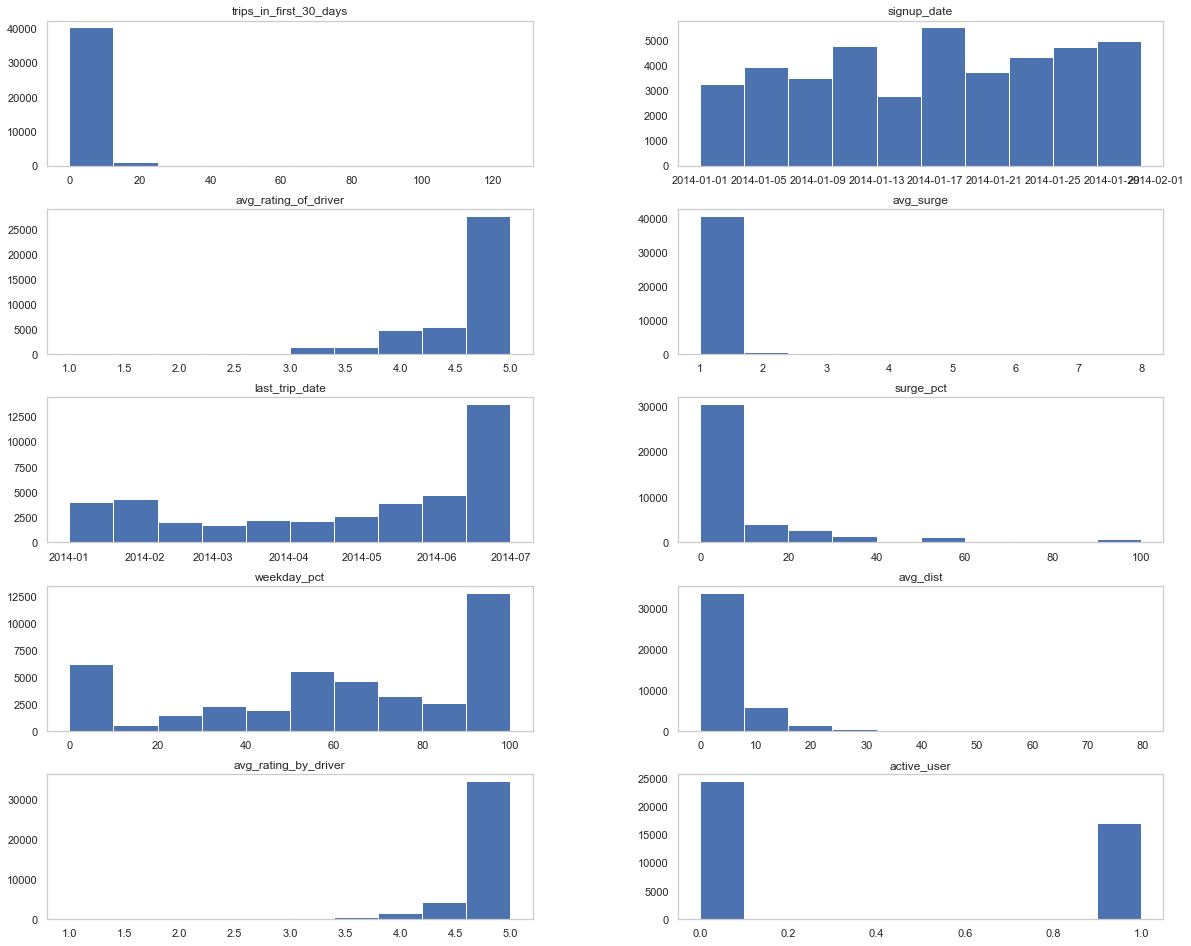

In [499]:
u_df.hist(figsize=(20,20), grid=False, layout=(6, 2), bins = 10)

<AxesSubplot:xlabel='active_user', ylabel='avg_surge'>

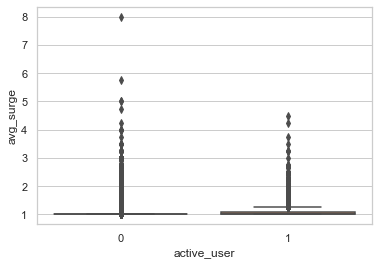

In [500]:
sns.boxplot(data=u_df, x='active_user', y='avg_surge')


In [501]:
u_df[u_df['avg_surge'] == 8]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
13861,Winterfell,1,2014-01-01,1.0,8.0,2014-01-01,iPhone,100.0,False,100.0,5.77,5.0,0


In [502]:
u_df.drop([13861], inplace = True)

In [503]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41444 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41444 non-null  object        
 1   trips_in_first_30_days  41444 non-null  int64         
 2   signup_date             41444 non-null  datetime64[ns]
 3   avg_rating_of_driver    41444 non-null  float64       
 4   avg_surge               41444 non-null  float64       
 5   last_trip_date          41444 non-null  datetime64[ns]
 6   phone                   41444 non-null  object        
 7   surge_pct               41444 non-null  float64       
 8   ultimate_black_user     41444 non-null  bool          
 9   weekday_pct             41444 non-null  float64       
 10  avg_dist                41444 non-null  float64       
 11  avg_rating_by_driver    41444 non-null  float64       
 12  active_user             41444 non-null  int64 

<AxesSubplot:xlabel='avg_surge', ylabel='active_user'>

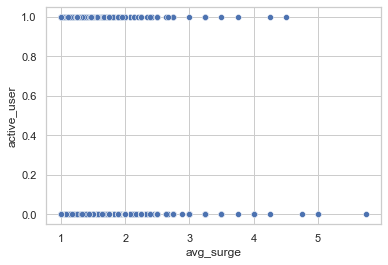

In [504]:
sns.scatterplot(data=u_df, x='avg_surge', y='active_user')

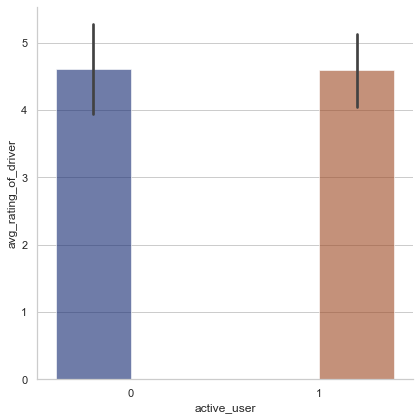

In [505]:
sns.catplot(
    data=u_df, kind='bar',
    x='active_user', y='avg_rating_of_driver', hue='active_user',
    ci="sd", palette="dark", alpha=.6, height=6
)

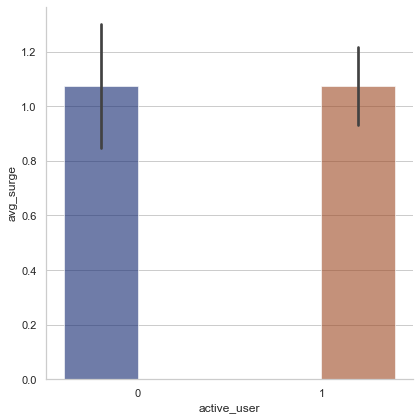

In [506]:
sns.catplot(
    data=u_df, kind='bar',
    x='active_user', y='avg_surge', hue='active_user',
    ci="sd", palette="dark", alpha=.6, height=6)

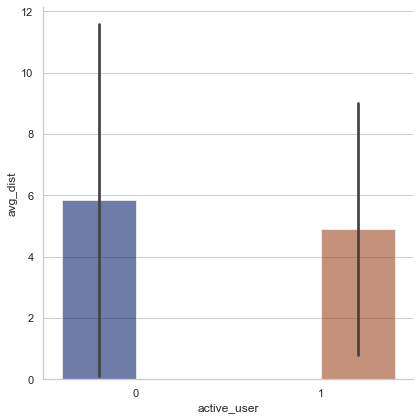

In [507]:
sns.catplot(
    data=u_df, kind='bar',
    x='active_user', y='avg_dist', hue='active_user',
    ci="sd", palette="dark", alpha=.6, height=6)

<AxesSubplot:xlabel='phone', ylabel='count'>

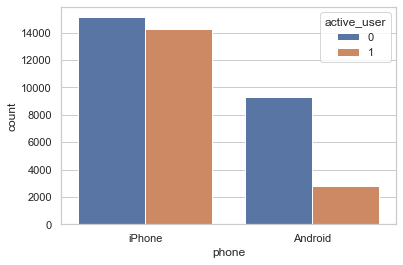

In [508]:
sns.countplot(x='phone',hue='active_user',data=u_df)

In [509]:
u_df[u_df['active_user'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,17035.0,3.575756,5.132168,0.0,0.00,2.00,5.00,125.00
avg_rating_of_driver,17035.0,4.592997,0.542454,1.0,4.30,4.80,5.00,5.00
avg_surge,17035.0,1.072826,0.142878,1.0,1.00,1.01,1.10,4.50
surge_pct,17035.0,9.142724,14.154435,0.0,0.00,2.50,14.30,100.00
weekday_pct,17035.0,61.689257,27.614271,0.0,45.50,63.90,82.40,100.00
avg_dist,17035.0,4.908831,4.112530,0.0,2.57,3.69,5.66,79.34
avg_rating_by_driver,17035.0,4.759630,0.295402,1.0,4.60,4.80,5.00,5.00
active_user,17035.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00


In [510]:
u_df[u_df['active_user'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,24409.0,1.935516,2.914060,0.0,0.0,1.00,2.00,73.00
avg_rating_of_driver,24409.0,4.607956,0.662225,1.0,4.3,5.00,5.00,5.00
avg_surge,24409.0,1.074233,0.225516,1.0,1.0,1.00,1.00,5.75
surge_pct,24409.0,8.724679,20.730952,0.0,0.0,0.00,0.00,100.00
weekday_pct,24409.0,60.950170,39.057475,0.0,31.6,66.70,100.00,100.00
avg_dist,24409.0,5.844726,5.725964,0.0,2.3,3.89,7.27,79.69
avg_rating_by_driver,24409.0,4.788172,0.465545,1.0,4.8,5.00,5.00,5.00
active_user,24409.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00


In [511]:
total_users = u_df.count()
retained_users = u_df[u_df['active_user'] == 1].count()
retained_percentage = ((retained_users / total_users) * 100)
print(retained_percentage)

city                      41.103658
trips_in_first_30_days    41.103658
signup_date               41.103658
avg_rating_of_driver      41.103658
avg_surge                 41.103658
last_trip_date            41.103658
phone                     41.103658
surge_pct                 41.103658
ultimate_black_user       41.103658
weekday_pct               41.103658
avg_dist                  41.103658
avg_rating_by_driver      41.103658
active_user               41.103658
dtype: float64


41% of users are considered retained, meaning 41% of users who signed up in January 2014 have taken a ride in the past 30 days since the last date the data was recorded.

<AxesSubplot:>

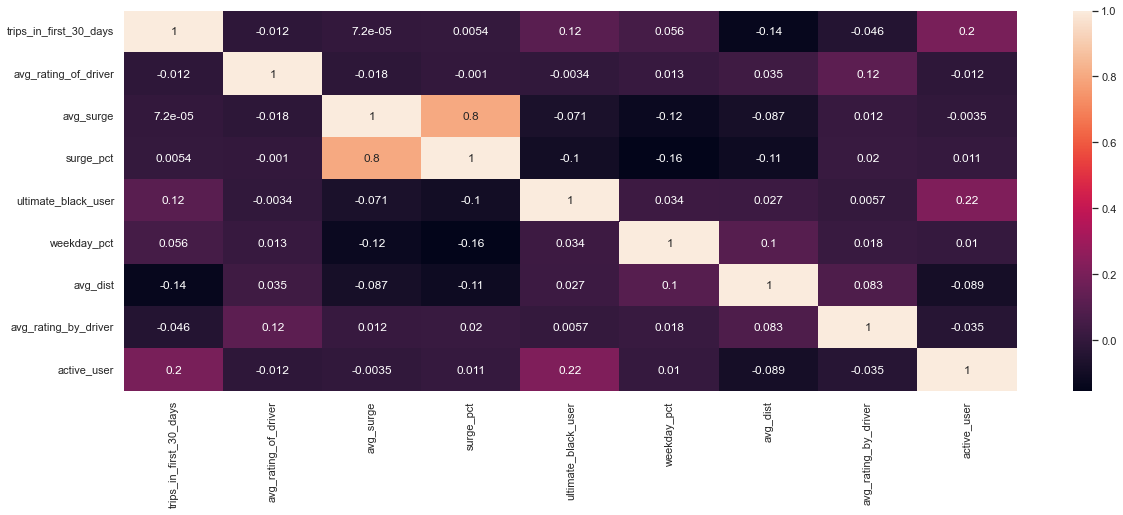

In [512]:
plt.figure(figsize=(20,7))
sns.heatmap(u_df.corr(), annot=True)

**2) Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.**

In [513]:
u_df.head().transpose()

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


In [514]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [515]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41444 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    41444 non-null  object        
 1   trips_in_first_30_days  41444 non-null  int64         
 2   signup_date             41444 non-null  datetime64[ns]
 3   avg_rating_of_driver    41444 non-null  float64       
 4   avg_surge               41444 non-null  float64       
 5   last_trip_date          41444 non-null  datetime64[ns]
 6   phone                   41444 non-null  object        
 7   surge_pct               41444 non-null  float64       
 8   ultimate_black_user     41444 non-null  bool          
 9   weekday_pct             41444 non-null  float64       
 10  avg_dist                41444 non-null  float64       
 11  avg_rating_by_driver    41444 non-null  float64       
 12  active_user             41444 non-null  int64 

In [522]:
model_df = pd.get_dummies(u_df)

In [523]:
model_df

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,2014-01-03,4.8,1.11,11.1,True,55.6,2.53,4.7,1,1,0,0,0,1
49994,1,2014-01-03,4.6,1.44,37.5,False,25.0,2.25,4.5,0,1,0,0,0,1
49995,0,2014-01-25,5.0,1.00,0.0,False,100.0,5.63,4.2,1,0,1,0,0,1
49997,0,2014-01-31,5.0,1.00,0.0,True,100.0,3.86,5.0,0,0,0,1,1,0


In [525]:
model_df = model_df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform) \
                .join(model_df.select_dtypes(include=['number']))

In [526]:
model_df

,signup_date,ultimate_black_user,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,24,1,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1
1,28,0,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0
2,5,0,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,1,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1
4,26,0,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2,1,3,4.8,1.11,11.1,55.6,2.53,4.7,1,1,0,0,0,1
49994,2,0,1,4.6,1.44,37.5,25.0,2.25,4.5,0,1,0,0,0,1
49995,24,0,0,5.0,1.00,0.0,100.0,5.63,4.2,1,0,1,0,0,1
49997,30,1,0,5.0,1.00,0.0,100.0,3.86,5.0,0,0,0,1,1,0


In [527]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop('active_user',axis=1), 
                                                    model_df['active_user'], test_size=0.30, 
                                                    random_state=101)

In [528]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [530]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,predictions)
rsquared = logmodel.score(X_test, y_test)

print(class_report)
print(rsquared)

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      7336
           1       0.67      0.54      0.60      5098

    accuracy                           0.71     12434
   macro avg       0.70      0.68      0.68     12434
weighted avg       0.70      0.71      0.70     12434

0.705163262023484


In [531]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

class_report2 = classification_report(y_test,predictions2)
rsquared2 = model2.score(X_test, y_test)

print(class_report2)
print(rsquared2)

              precision    recall  f1-score   support

           0       0.68      0.88      0.76      7336
           1       0.69      0.40      0.51      5098

    accuracy                           0.68     12434
   macro avg       0.69      0.64      0.64     12434
weighted avg       0.68      0.68      0.66     12434

0.681920540453595


In [532]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(max_depth=5, random_state=20)
model3.fit(X_train,y_train)
predictions3 = model3.predict(X_test)

class_report3 = classification_report(y_test,predictions3)
rsquared3 = model3.score(X_test, y_test)

print(class_report3)
print(rsquared3)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      7336
           1       0.76      0.64      0.69      5098

    accuracy                           0.77     12434
   macro avg       0.76      0.75      0.75     12434
weighted avg       0.77      0.77      0.76     12434

0.7674923596589995


In [537]:
features = pd.DataFrame(model3.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
features

,importance
avg_rating_by_driver,0.195602
surge_pct,0.150666
avg_surge,0.137480
city_King's Landing,0.127236
weekday_pct,0.091812
phone_iPhone,0.069227
ultimate_black_user,0.066667
phone_Android,0.060909
city_Astapor,0.035654
trips_in_first_30_days,0.024201


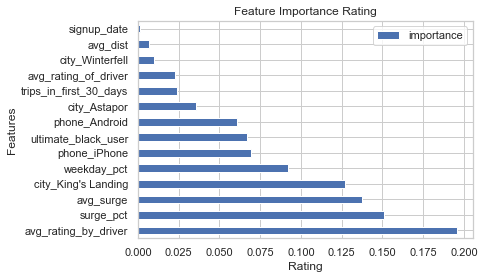

In [540]:
features.plot(kind= 'barh')
_ = plt.title('Feature Importance Rating')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Features')

In order to identify if a user is likely to be active within six months of joining, I built three predictive models (logistic regression, KNN, random forest) and compared their measurement scores. The random forest model performed the best in terms of having the highest f-1 scores for both predicting an inactive user and an active user. However, my biggest concern with this model, as well as with the others, is that it does a relatively good job at predicting inactive users, but performs poorly on predicting active users.

Looking at the features importance for the random forest model you can see that the avg_rating_by_driver and surge_pct have the highest correlation with predicting whether a user is inactive or not.

**3) Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).**

Ultimate can use this model to identify which users are likely to be inactive with in six months, since the model performs better on these users. By having this information, Ultimate can make a strategy specifically with the goal to retain inactive users and keep potential inactive users engagaged with the platform. I would recommend that Ultimate identify triggers for behavior motiviation to increase retention in the product, such as daily reminders, push notifications, gamification of the app, and other product integrations.